# Reading WAV File

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, filtfilt

# Read WAV file
fs, data = wavfile.read("mixed_signal.wav")

# Show basic info
print(f"Sample rate: {fs} Hz")
print(f"Data type: {data.dtype}")
print(f"Number of samples: {len(data)}")
print(f"Duration: {len(data)/fs:.2f} seconds")

Sample rate: 1000 Hz
Data type: float64
Number of samples: 1000
Duration: 1.00 seconds


# Time Domain Plot of the Signal

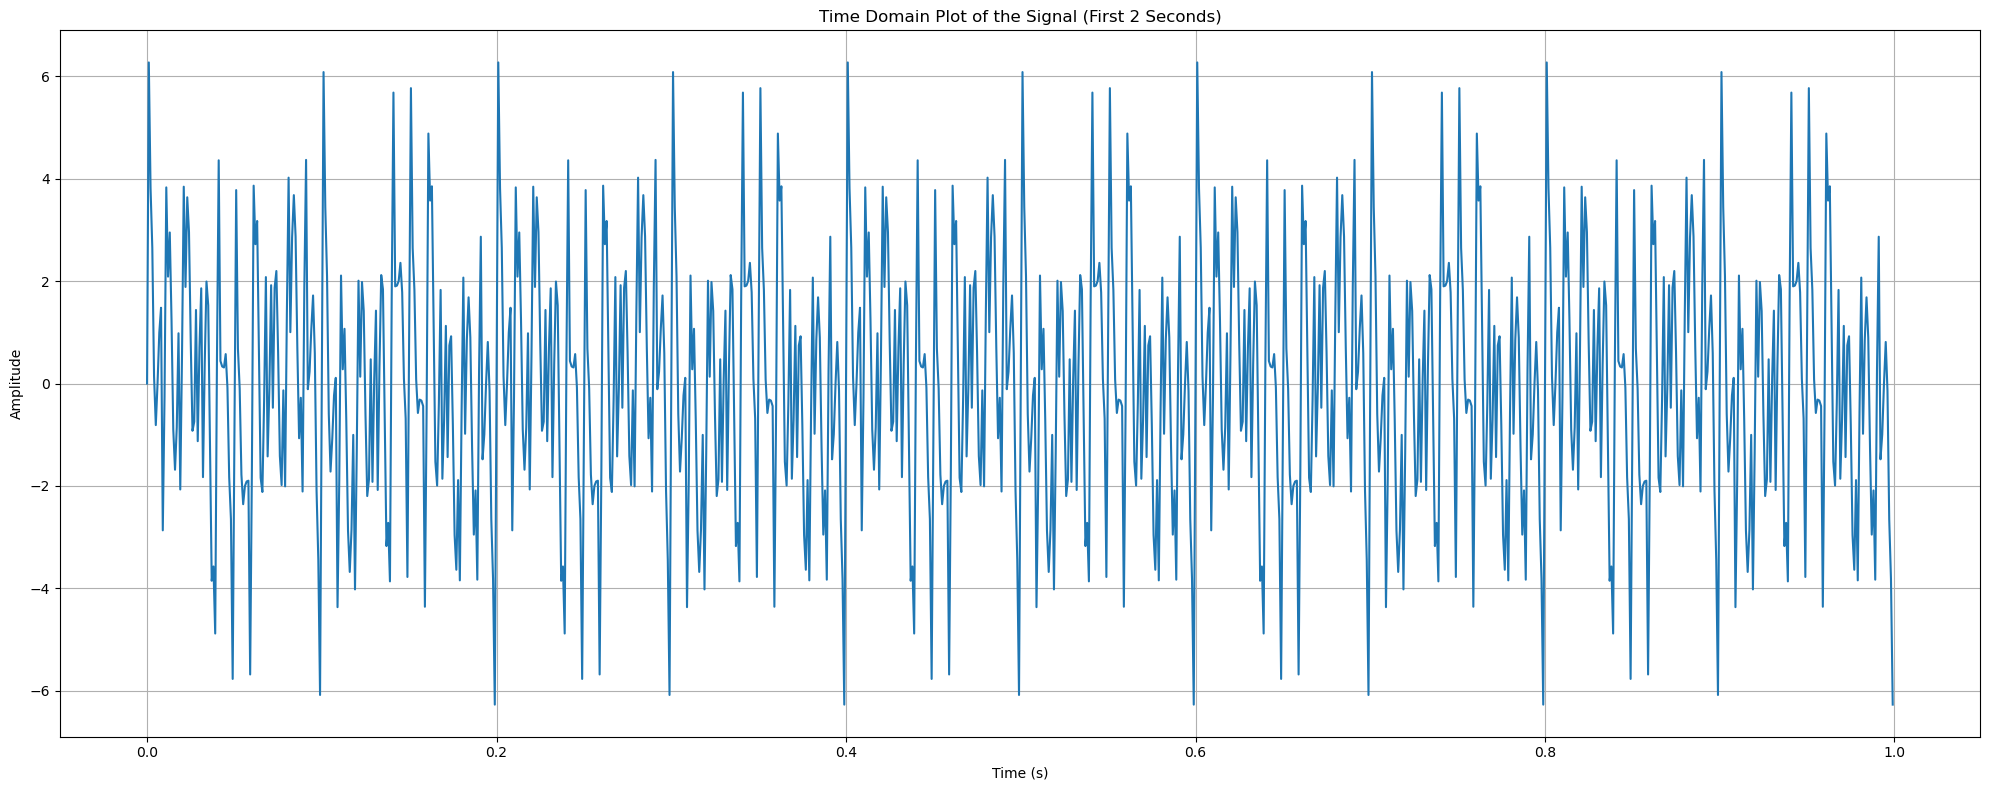

In [20]:
# Create time axis
t = np.linspace(0, len(data)/fs, num=len(data), endpoint=False)

# Plot a portion of the signal
plt.figure(figsize=(20, 8))
plt.plot(t[:2000], data[:2000])  # Show first 2 seconds if fs = 1000
plt.title("Time Domain Plot of the Signal (First 2 Seconds)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()


# Frequency Domain Plot of the Signal

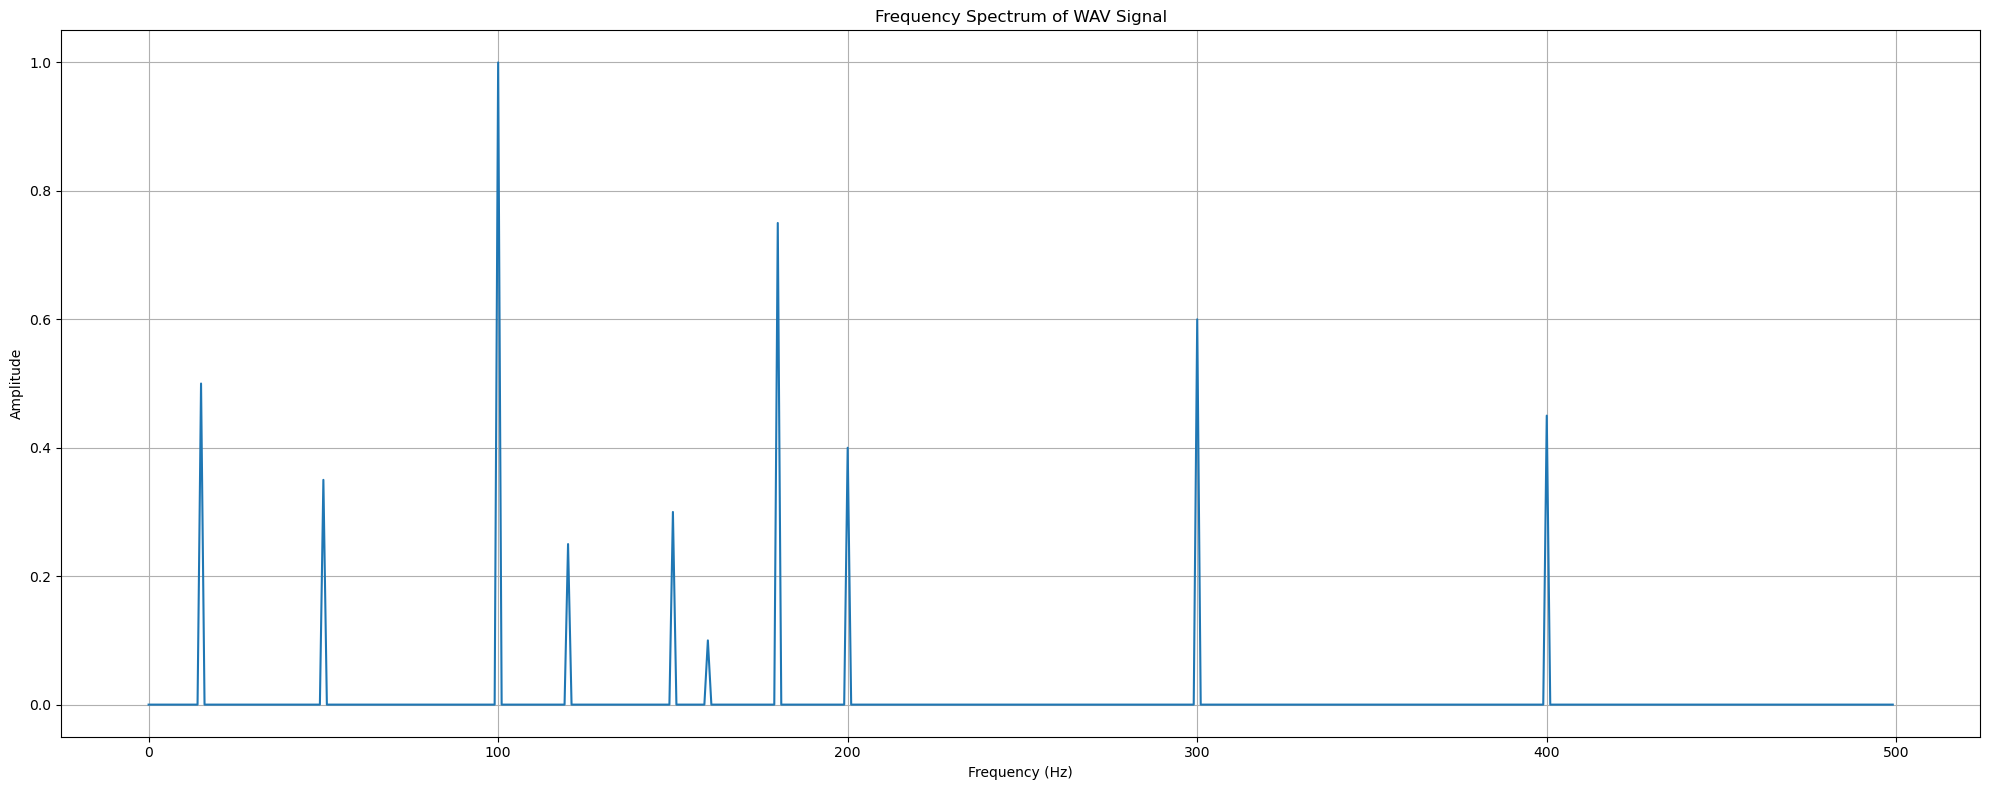

In [3]:
# Convert stereo to mono

if data.ndim == 2:
    data = data.mean(axis=1)

# Normalize to [-1, 1] range (if using int16)
if data.dtype == np.int16:
    data = data / 32768.0
    
# Perform FFT
N = len(data)
fft_vals = np.fft.fft(data)
fft_freqs = np.fft.fftfreq(N, 1/fs)

# Keep only positive frequencies
mask = fft_freqs >= 0
fft_freqs = fft_freqs[mask]
amplitude = np.abs(fft_vals[mask]) / N  # Normalize amplitude

# Plot frequency spectrum
plt.figure(figsize=(20, 8))
plt.plot(fft_freqs, amplitude)
plt.title("Frequency Spectrum of WAV Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# Time and Frequency Domain Plot

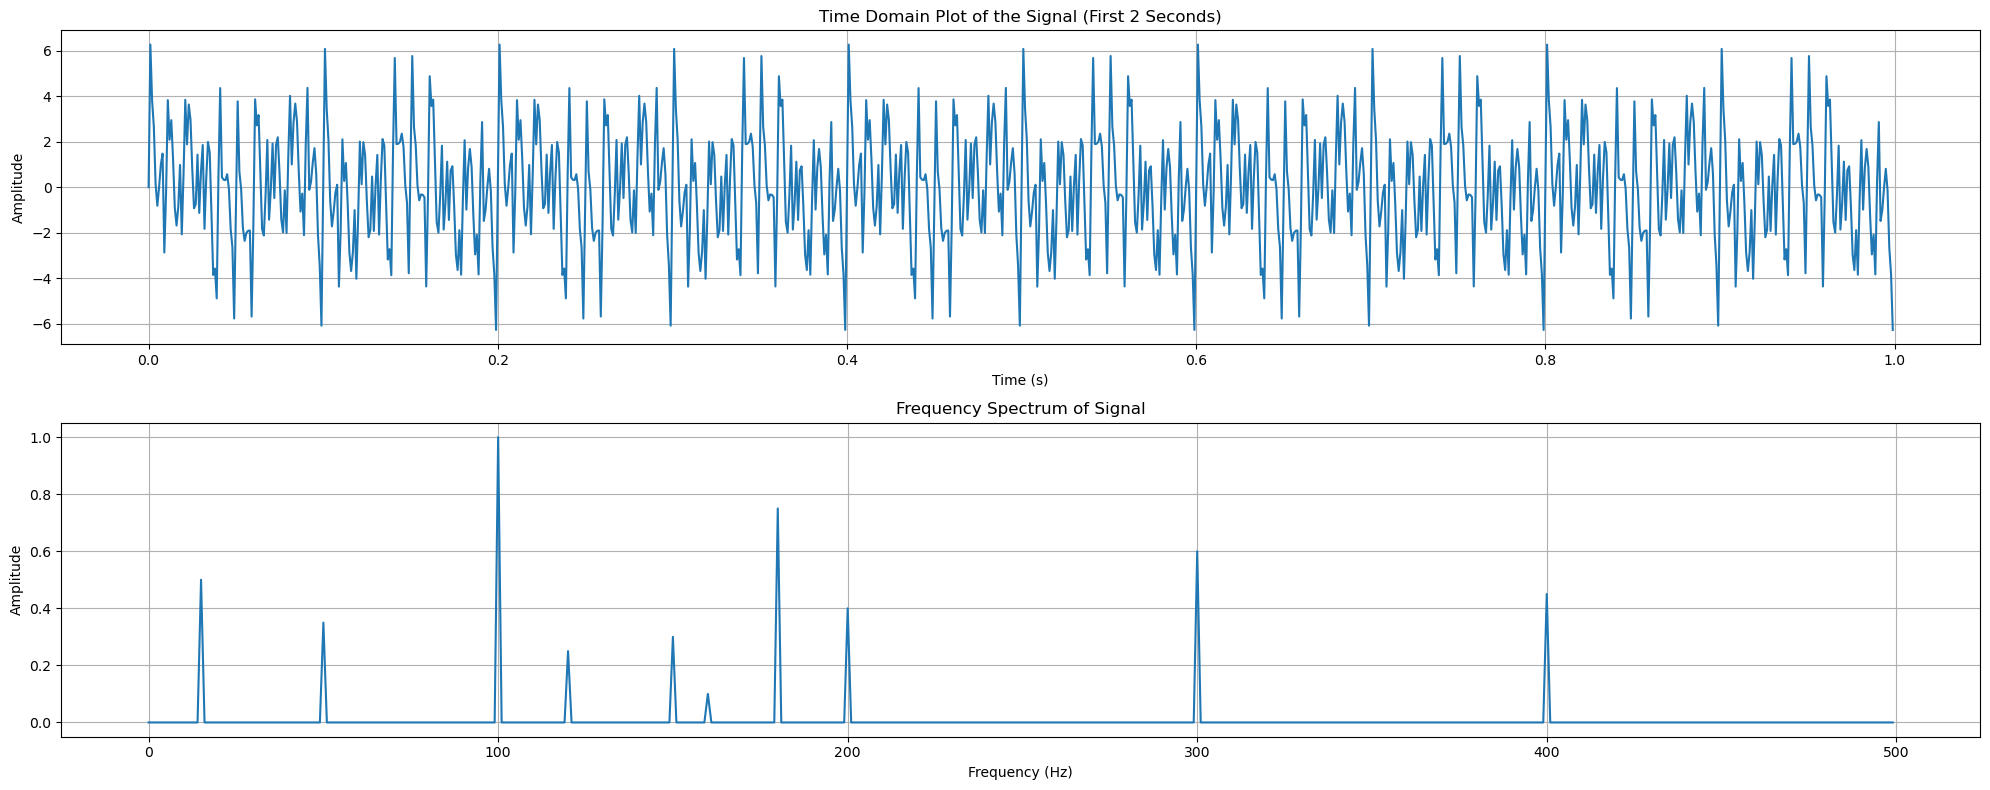

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(20, 8))

#Plot Time domain
axs[0].plot(t[:2000], data[:2000])  # Show first 2 seconds if fs = 1000
axs[0].set_title("Time Domain Plot of the Signal (First 2 Seconds)")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Amplitude")
axs[0].grid(True)

# Plot frequency spectrum
axs[1].plot(fft_freqs, amplitude)
axs[1].set_title("Frequency Spectrum of Signal")
axs[1].set_xlabel("Frequency (Hz)")
axs[1].set_ylabel("Amplitude")
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [5]:
# Print frequency components and their amplitudes
for f, a in zip(fft_freqs, amplitude):
    if a > 0.02:  # Filter out very small amplitudes (optional)
        print(f"Frequency: {f:.2f} Hz, Amplitude: {a:.4f}")

Frequency: 15.00 Hz, Amplitude: 0.5000
Frequency: 50.00 Hz, Amplitude: 0.3500
Frequency: 100.00 Hz, Amplitude: 1.0000
Frequency: 120.00 Hz, Amplitude: 0.2500
Frequency: 150.00 Hz, Amplitude: 0.3000
Frequency: 160.00 Hz, Amplitude: 0.1000
Frequency: 180.00 Hz, Amplitude: 0.7500
Frequency: 200.00 Hz, Amplitude: 0.4000
Frequency: 300.00 Hz, Amplitude: 0.6000
Frequency: 400.00 Hz, Amplitude: 0.4500


# Filter Design

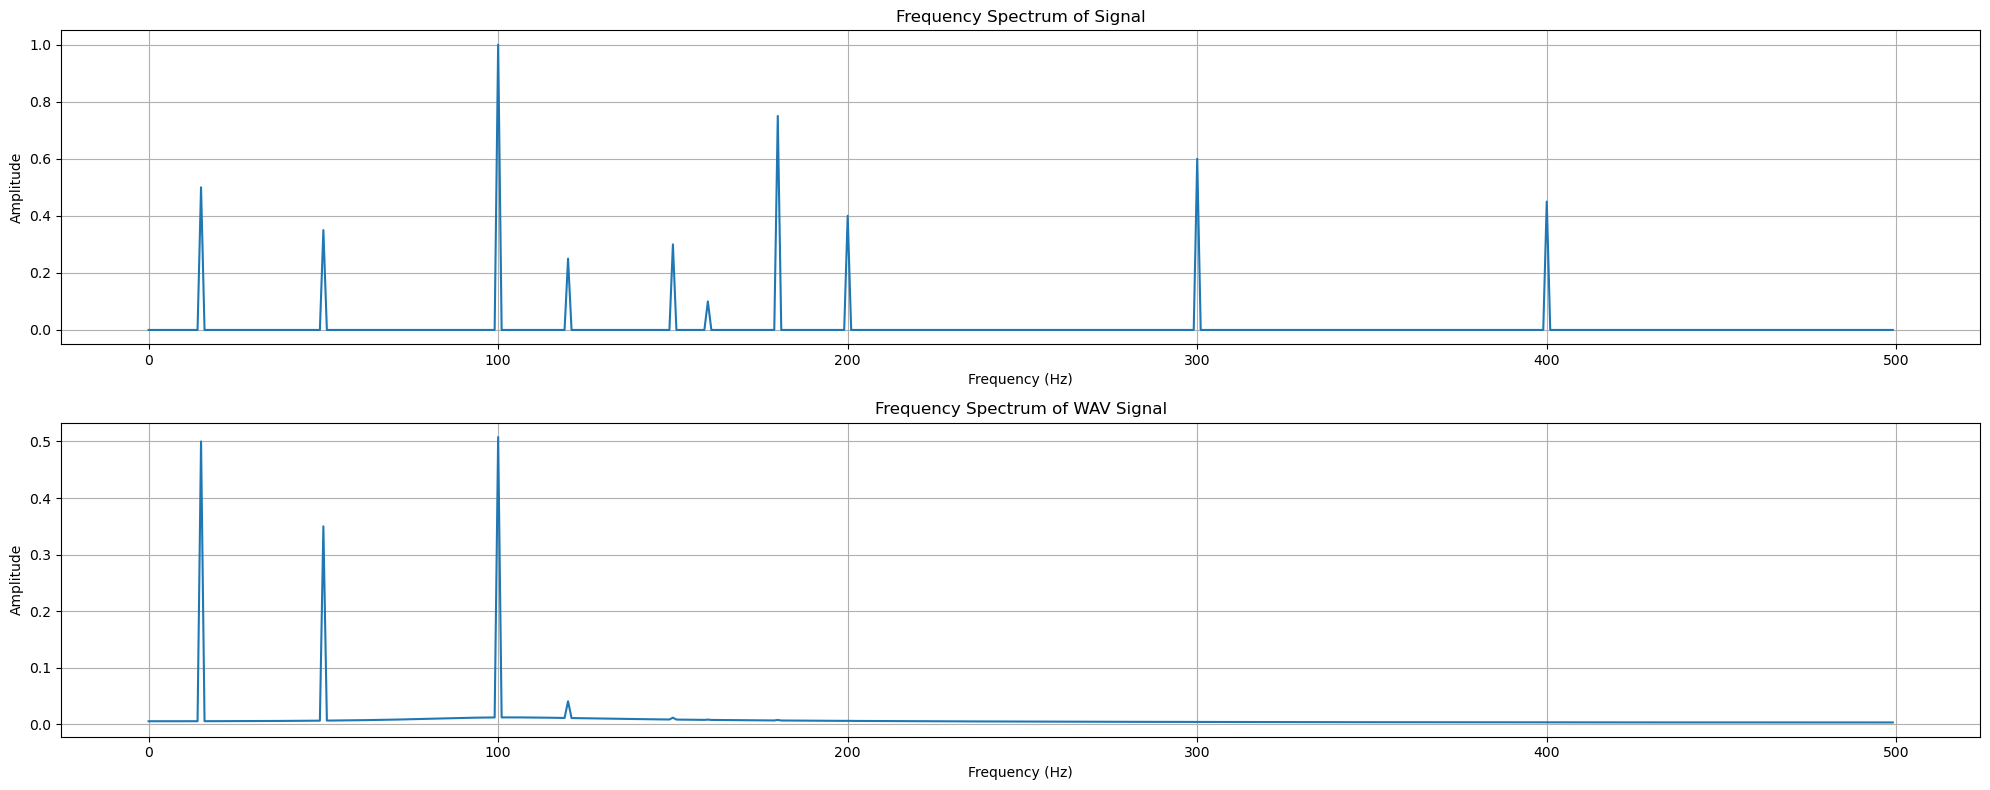

In [7]:
# Butterworth low-pass filter design

#Filter Parameters:
cutoff_frequency = 100 # Hz

def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y
    
def butter_highpass_filter(data, cutoff, fs, order=5):
    """
    Apply a Butterworth high-pass filter.
    
    data: input signal
    cutoff: cutoff frequency in Hz
    fs: sample rate in Hz
    order: filter order (higher = sharper roll-off)
    """
    sos = butter(order, cutoff, btype='highpass', fs=fs, output='sos')
    filtered = sosfilt(sos, data)
    return filtered
    
# Apply the filter

filtered_signal = butter_lowpass_filter(data, cutoff_frequency, fs)

filtered_data = filtered_signal 

# Perform FFT
N = len(filtered_data)
filtered_fft_vals = np.fft.fft(filtered_data)
filtered_fft_freqs = np.fft.fftfreq(N, 1/fs)

# Keep only positive frequencies
filtered_mask = filtered_fft_freqs >= 0
filtered_fft_freqs = filtered_fft_freqs[mask]
filtered_amplitude = np.abs(filtered_fft_vals[filtered_mask]) / N  # Normalize amplitude

fig, axs = plt.subplots(2, 1, figsize=(20, 8))

# Plot frequency spectrum of the original signal
axs[0].plot(fft_freqs, amplitude)
axs[0].set_title("Frequency Spectrum of Signal")
axs[0].set_xlabel("Frequency (Hz)")
axs[0].set_ylabel("Amplitude")
axs[0].grid(True)

# Plot frequency spectrum of the filtered signal
axs[1].plot(filtered_fft_freqs, filtered_amplitude)
axs[1].set_title("Frequency Spectrum of the Filtered Signal using LPF")
axs[1].set_xlabel("Frequency (Hz)")
axs[1].set_ylabel("Amplitude")
axs[1].grid(True)

plt.tight_layout()
plt.show()

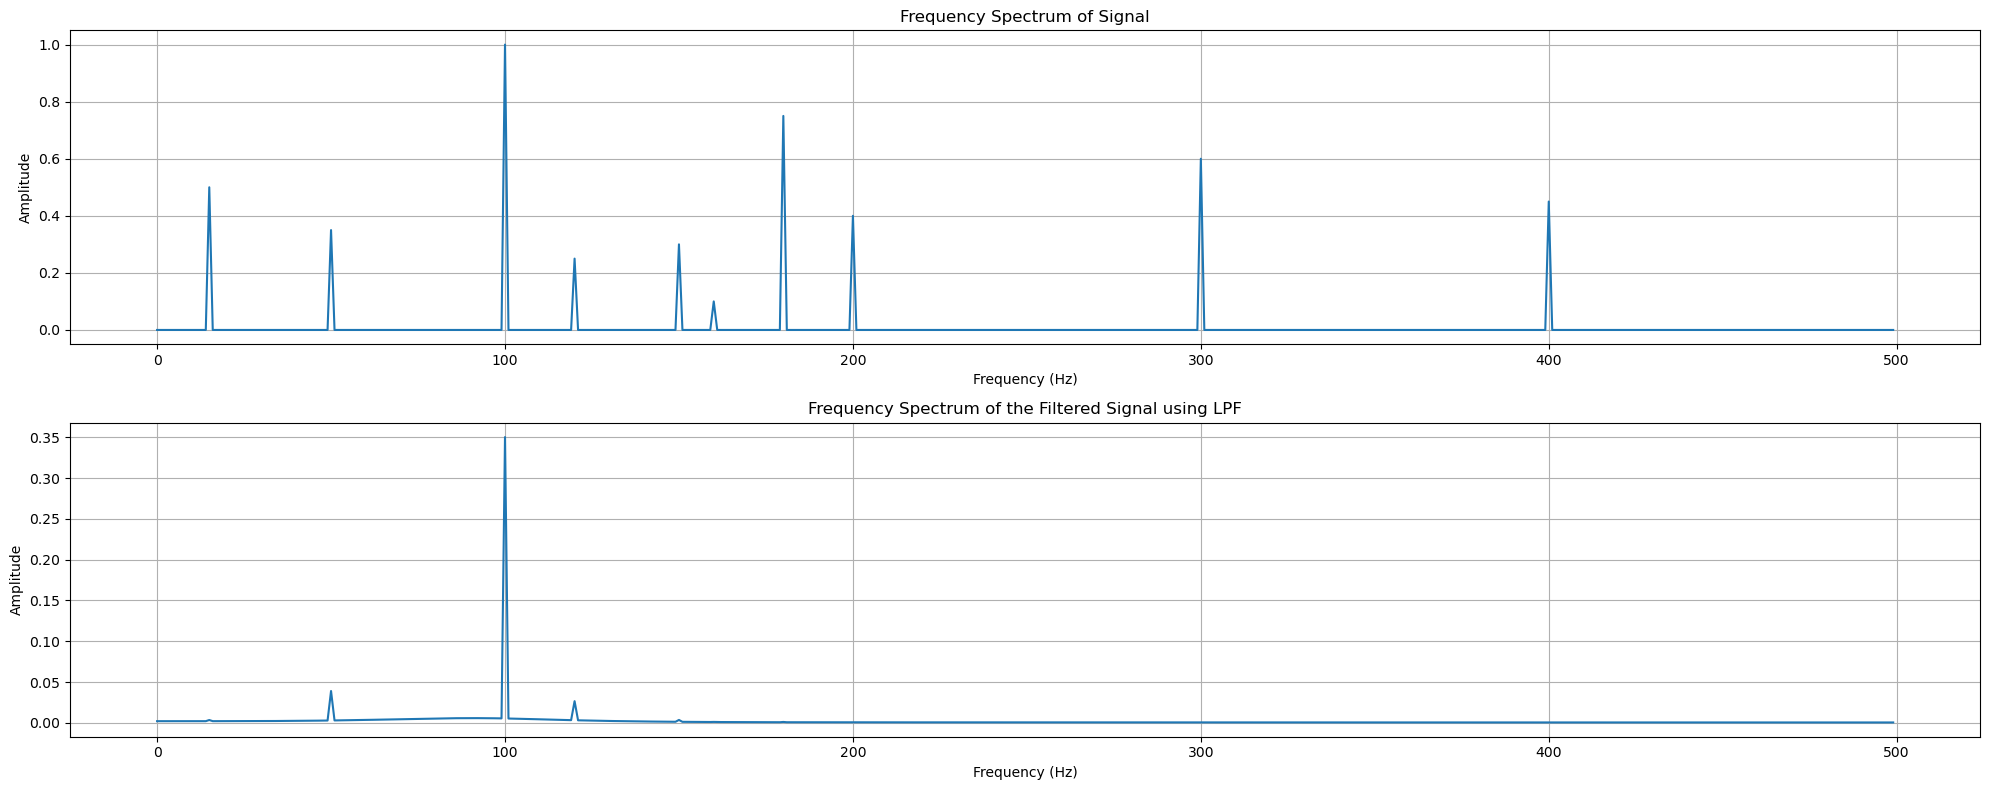

In [18]:
# Butterworth high-pass filter design
from scipy.signal import butter, sosfilt

#Filter Parameters:
cutoff_frequency = 100 # Hz

def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y
    
def butter_highpass_filter(data, cutoff, fs, order=5):
    """
    Apply a Butterworth high-pass filter.
    
    data: input signal
    cutoff: cutoff frequency in Hz
    fs: sample rate in Hz
    order: filter order (higher = sharper roll-off)
    """
    sos = butter(order, cutoff, btype='highpass', fs=fs, output='sos')
    filtered = sosfilt(sos, data)
    return filtered
    
# Apply the filter

filtered_signal = butter_highpass_filter(data, cutoff_frequency, fs, order=3)

filtered_data = filtered_signal 

# Perform FFT
N = len(filtered_data)
filtered_fft_vals = np.fft.fft(filtered_data)
filtered_fft_freqs = np.fft.fftfreq(N, 1/fs)

# Keep only positive frequencies
filtered_mask = filtered_fft_freqs >= 0
filtered_fft_freqs = filtered_fft_freqs[mask]
filtered_amplitude = np.abs(filtered_fft_vals[filtered_mask]) / N  # Normalize amplitude

fig, axs = plt.subplots(2, 1, figsize=(20, 8))

# Plot frequency spectrum of the original signal
axs[0].plot(fft_freqs, amplitude)
axs[0].set_title("Frequency Spectrum of Signal")
axs[0].set_xlabel("Frequency (Hz)")
axs[0].set_ylabel("Amplitude")
axs[0].grid(True)

# Plot frequency spectrum of the filtered signal
axs[1].plot(filtered_fft_freqs, filtered_amplitude)
axs[1].set_title("Frequency Spectrum of the Filtered Signal using LPF")
axs[1].set_xlabel("Frequency (Hz)")
axs[1].set_ylabel("Amplitude")
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [10]:
# Print frequency components and their amplitudes
print ("Frequency Present after Filtering")
for f, a in zip(filtered_fft_freqs, filtered_amplitude):
    if a > 0.05:  # Filter out very small amplitudes (optional)
        print(f"Frequency: {f:.2f} Hz, Amplitude: {a:.4f}")

Frequency Present after Filtering
Frequency: 15.00 Hz, Amplitude: 0.5001
Frequency: 50.00 Hz, Amplitude: 0.3500
Frequency: 100.00 Hz, Amplitude: 0.5077


# Spectrogram/Waterfall

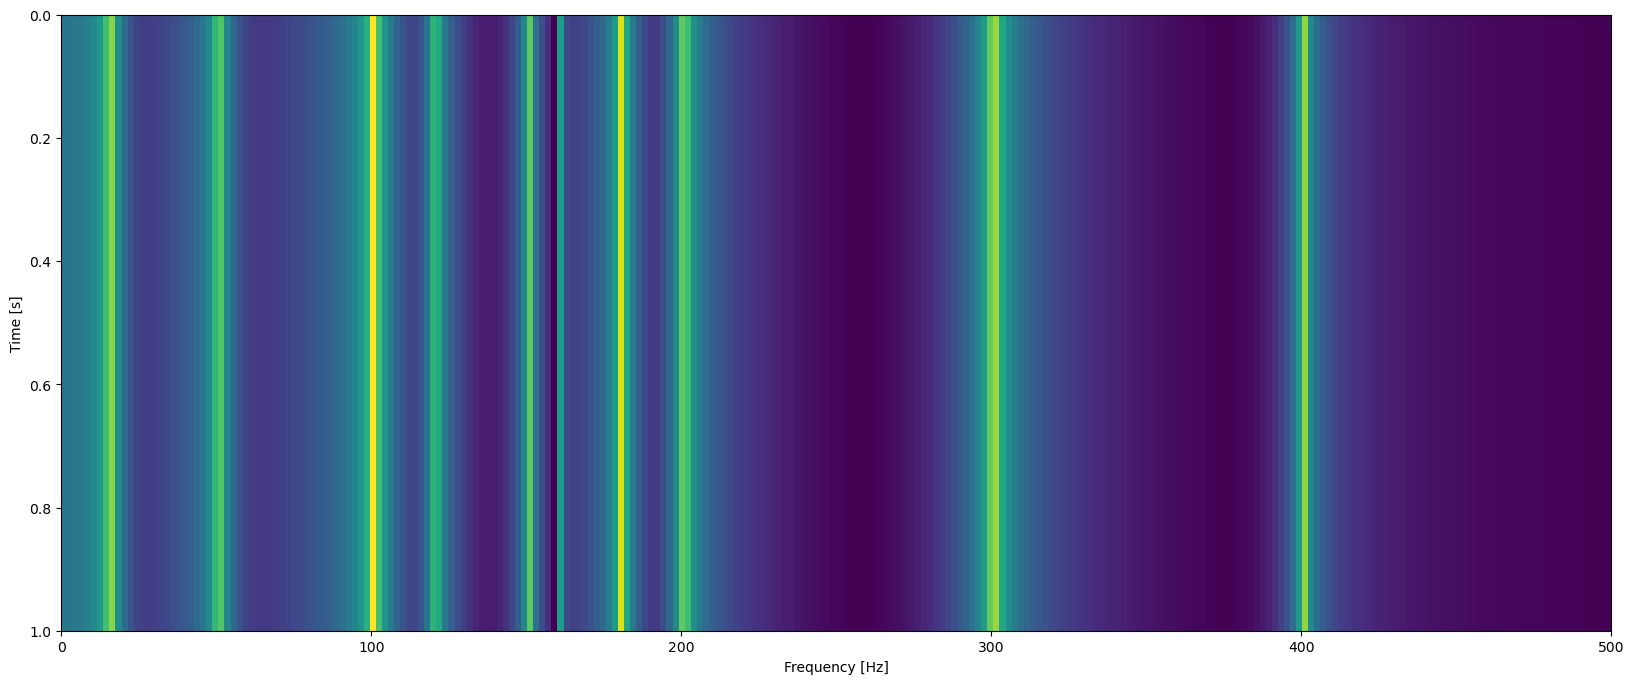

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, filtfilt

# Read WAV file
fs, data = wavfile.read("mixed_signal.wav")


# Create frequency axis
f = np.linspace(0, len(data)/fs, num=len(data), endpoint=False)

# Convert stereo to mono
"""
if data.ndim == 2:
    data = data.mean(axis=1)

# Normalize to [-1, 1] range (if using int16)
if data.dtype == np.int16:
    data = data / 32768.0
""" 

# Perform FFT

fft_size = 512
num_rows = len(data) // fft_size # // is an integer division which rounds down
spectrogram = np.zeros((num_rows, fft_size))
for i in range(num_rows):
    spectrogram[i,:] = 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(data[i*fft_size:(i+1)*fft_size])))**2)
"""
plt.figure(figsize=(20, 8)) 
plt.imshow(spectrogram, aspect='auto', extent = [fs/-2/1e3, fs/2/1e3, len(data)/fs, 0])
plt.xlabel("Frequency [Hz]")
plt.ylabel("Time [s]")
plt.show()
"""
#Showing only the positive frequencies
positive_freq_spectrogram = spectrogram[:, spectrogram.shape[1] // 2:]

# Define the frequency range in MHz (from 0 to fs/2)
freq_min = 0
freq_max = fs / 2  # convert to MHz

plt.figure(figsize=(20, 8))
plt.imshow(positive_freq_spectrogram, aspect='auto',
           extent=[freq_min, freq_max, len(data)/fs, 0])
plt.xlabel("Frequency [Hz]")
plt.ylabel("Time [s]")
plt.show()

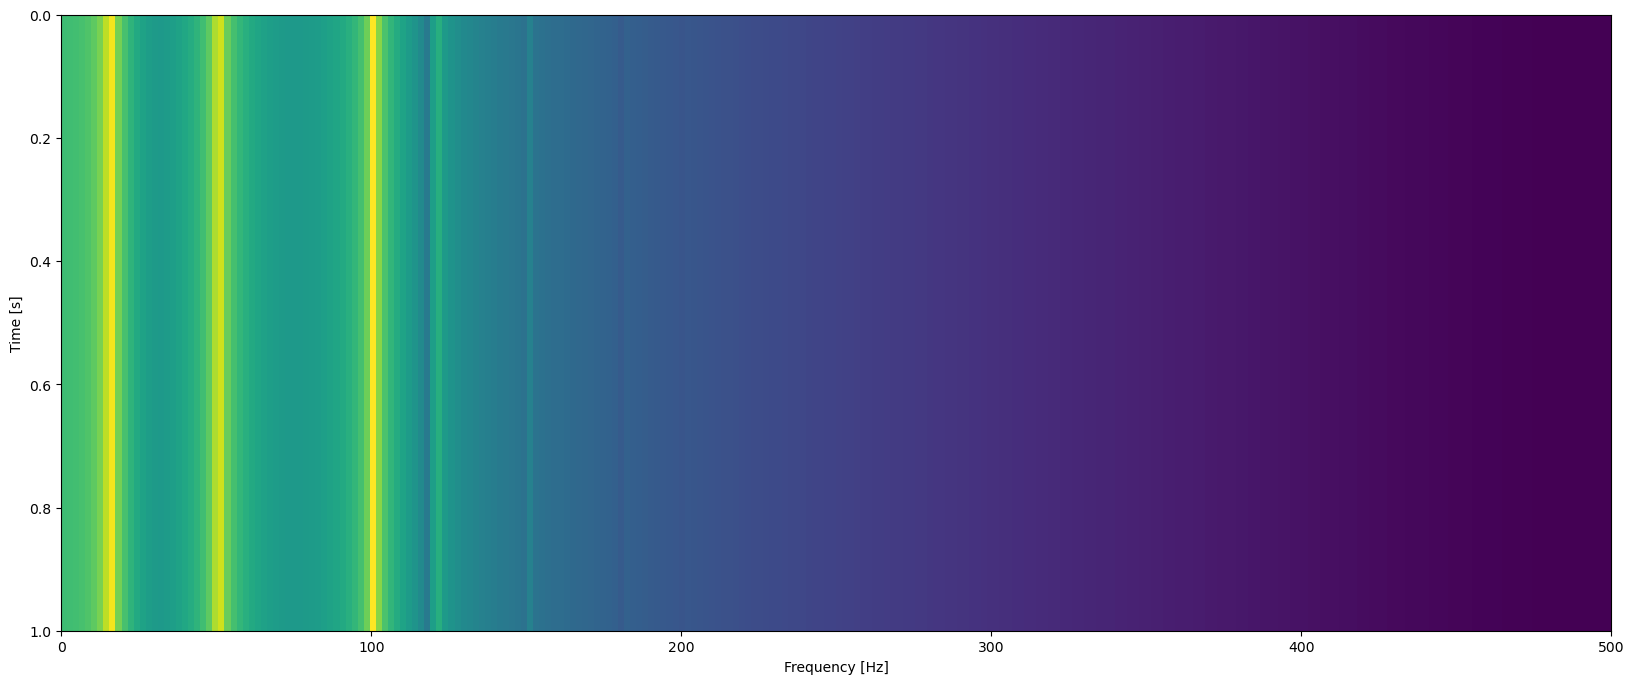

In [14]:
data = filtered_data 

# Create frequency axis
f = np.linspace(0, len(data)/fs, num=len(data), endpoint=False)


# Perform FFT


fft_size = 512
num_rows = len(data) // fft_size # // is an integer division which rounds down
spectrogram = np.zeros((num_rows, fft_size))
for i in range(num_rows):
    spectrogram[i,:] = 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(data[i*fft_size:(i+1)*fft_size])))**2)

#showing only the positive frequencies
positive_freq_spectrogram = spectrogram[:, spectrogram.shape[1] // 2:]

# Define the frequency range in MHz (from 0 to fs/2)
freq_min = 0
freq_max = fs / 2  # convert to MHz

plt.figure(figsize=(20, 8))
plt.imshow(positive_freq_spectrogram, aspect='auto',
           extent=[freq_min, freq_max, len(data)/fs, 0])
plt.xlabel("Frequency [Hz]")
plt.ylabel("Time [s]")
plt.show()